# Preparación de los datos
Antes de entrar en los detalles de scikit-learn, es importante entender cómo preparar los datos que utilizan los algoritmos. Esto requiere repasar conceptos de NumPy.

Básicamente, podemos imaginar que scikit-learn toma como entrada para el aprendizaje **una tabla** donde cada fila es un individuo o instancia, y cada columna un atributo, característica o variable.

## Machine learning y datos
La idea fundamental del machine learning (ML) es obtener **modelos**. Estos modelos no son otra cosa que programas que implementan fórmulas matemáticas o procedimientos de decisión con **parámetros ajustables** a partir de **datos**.

Por ejemplo, en un modelo de regresión lineal simple, el modelo matemático es el de la ecuación de una recta, y los parámetros ajustables son los parámetros de esa ecuación. Si tenemos la ecuación $$y= \alpha x + \beta$$

* El parámetro $\alpha$ indica la inclinación (slope) de la recta.
* El parámetro $\beta$ indica dónde corta la recta al eje y (intercept).

Entonces la tarea del algoritmo de ML (en nuestro caso, un algoritmo de regresión de mínimos cuadrados por ejemplo) es **hallar los parámetros del modelo que se ajustan a los datos.**

Típicamente, los parámetros son un array de valores reales (float), y en muchas ocasiones, los datos se representan con matrices numéricas.

Ahora bien, el modelo de regresión que acabamos de describir es muy simple y tiene bastantes limitaciones. Por eso, para una tarea similar, como es la regresión, nos encontramos con **diferentes algoritmos**, que generan modelos también diferentes, más simples o complicados, o bien con diferentes propiedades que los hacen más útiles para ciertras situaciones.

Por ejemplo, si vemos la "chuleta" de uso de scikit-learn:

![scikit-learn cheatsheet](http://1.bp.blogspot.com/-ME24ePzpzIM/UQLWTwurfXI/AAAAAAAAANw/W3EETIroA80/s1600/drop_shadows_background.png)

Vemos que nos indica que los [regresores SGD](http://scikit-learn.org/stable/modules/sgd.html) se recomiendan para datasets grandes. Aunque es sólo una recomendación, es un ejemplo de criterio de decisión en este caso sobre el número de instancias. Cada algoritmo tiene unas ventajas e inconvenientes para diferentes tipos de problemas. En cualquier caso, seleccionar el mejor algoritmo para un problema dado no es fácil, por lo que en ocasiones la mejor aproximación es "ensayo y error" con varios de ellos.

## Arrays y matrices con NumPy para machine learning
Las listas en Python permiten crear arrays y matrices y manipularlos.

In [1]:
a = [2.5, 3.2, 1, 7., -6]
print a[2]
print a[3:5] # Este es un "slice" de a.

1
[7.0, -6]


In [2]:
m = [ [3, 4, -2.1, 3],
      [7, 2, 4.05, 4], 
      [88, 22, 23, 11],
      [0, 1, 0, 1, 12]
     ]
print m[0][2]
print m[0:2]

-2.1
[[3, 4, -2.1, 3], [7, 2, 4.05, 4]]


No obstante, en SciPy se utiliza para representar estructuras de arrays o matrices la biblioteca NumPy, dado que es mucho **más eficiente** y tiene asociadas funciones y utilidades que hacen la manipulación más sencilla para el análisis de datos

In [3]:
import numpy as np
a = np.array([2.5, 3.2, 1, 7., -6]) # Construimos el array NumPy a partir de una lista.
print a[2]
print a[3:5] # Este es un "slice" de a. 

print "-------"
b = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15])
b = b.reshape((3, 5))
print b

print "-------"

# una columna:
print b[:,1]

# una fila:
print b[2]

1.0
[ 7. -6.]
-------
[[ 1  2  3  4  5]
 [ 6  7  8  9 10]
 [11 12 13 14 15]]
-------
[ 2  7 12]
[11 12 13 14 15]


En el paquete np.random tenemos muchas utilidades para generar datos aleatorios. También hay en NumPy diferentes funciones para crear datos, como `np.ones()` o `np.linspace().

In [4]:
c = np.random.randn(20) # 20 números de una distribución normal.
print c
c = np.random.randint(1, 100, 10) # 10 números enteros entre 1 y 100.
print c

[ 1.74755657 -0.37533362 -1.01075949  0.32084206 -1.31220502 -1.09837878
  0.02177289  0.33593112 -0.68611156  0.53584027  1.63813018  0.01900862
 -1.7123645   1.64379798  0.18785116  1.21648242  0.18013121  0.72872432
 -0.82346166 -0.70799147]
[72 76 40 92 42 59 95 89 80 52]


También en muchas ocasiones es interesante convertir un vector de filas en un vector de columnas. Esto se utiliza con frecuencia en scikit-learn por la forma que tienen los algoritmos de tomar los datos de entrada.

In [5]:
y = np.linspace(0, 24, 9)
print y

print "-------"
y = y[:, np.newaxis]
print y

[  0.   3.   6.   9.  12.  15.  18.  21.  24.]
-------
[[  0.]
 [  3.]
 [  6.]
 [  9.]
 [ 12.]
 [ 15.]
 [ 18.]
 [ 21.]
 [ 24.]]


## Un ejemplo simple
En el siguiente código utilizamos una función que entrena y visualiza el resultado de un clasificador. El clasificador concreto no es importante, de momento nos fijamos solo en el resultado.

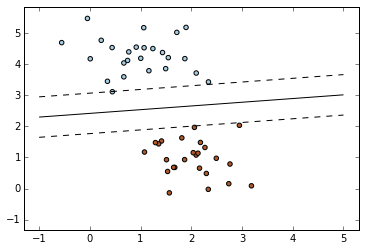

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
from sgd_separator import plot_sgd_separator
plot_sgd_separator()

La imagen resultante nos muestra:
* Dos nubes de puntos, que son las instancias originales del problema. En este caso, para poder visualizarlo bien, tenemos sólo dos atributos o características.
* Cada nube de puntos está en un color diferente que indica su clase. Nos encontramos con un problema de aprendizaje supervisado, porque esas clases son conocidas de antemano para los datos de entrenamiento y se utilizan en el aprendizaje.
* El **modelo** resultante es en este caso una línea que vemos que divide el plano en dos, permitiendo diferenciar las dos clases.

Es importante resaltar dos cosas de este ejemplo:
* Lo primero, a diferencia de una regresión, la línea solo sirve para discriminar dos partes del plano que serían las dos clases. En la regresión, la recta trata de ajustarse a los puntos, en la clasificación, sirve para separarlos.
* Cualquier punto nuevo (una instancia nueva, un nuevo cliente por ejemplo) estará a un lado un otro de la línea. Es decir, el modelo permite predecir la clase. Incluso cuando el punto no sea uno de los utilizados en el entrenamiento. Esto quiere decir que el modelo generaliza.

## Datos en scikit-learn
Se asume en general que se representa como un array de dos **dimensiones** de tamaño `[n_samples, n_features]`, donde:
* `n_samples` es el número de instancias, individuos u observaciones. Por ejemplo, cada instancia puede representar la información de un cliente.
* `n_features` es el numero de características (campos, atributos, variables). Por ejemplo, puede ser una caracterísitica del cliente el gasto que hace, las veces que visita nuestra página o la región en la que vive.

Normalmente pensamos en los datos como numéricos o etiquetas, pero un individuo puede ser también un documento o una imagen.

Scikit-learn incluye una biblioteca de **datasets preparados para probar y utilizar** como ejemplo. En esa biblioteca se trata con objetos Bunch que contienen los datos y su descripción.

In [7]:
from sklearn.datasets import load_boston
boston = load_boston()
print boston.keys()
print boston.feature_names # Los nombres de los atributos.
print boston.data.shape
# Con esto obtenemos la descripción del dataset:
# print boston.DESCR

['data', 'feature_names', 'DESCR', 'target']
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
(506, 13)


También se pueden descargar datasets del sitio http://mldata.org con una función de utilidad [`fetch_mldata()`](http://scikit-learn.org/0.12/modules/generated/sklearn.datasets.fetch_mldata.html). Se puede consultar [aquí](http://scikit-learn.org/stable/datasets/) todas las utilidades relacionadas con cargar datos.

## Un ejemplo simple con arrays
Vamos a ver un ejemplo de juguete para poner en práctica el uso básico de un clasificador. Utilizaremos matrices en este caso.

In [8]:
X = np.array([
    [1, 1], [1.5, 0.95], [1.5, 1.75], [1.9, 2], [2.2, 1.8]
])
y = ["a", "a", "a", "b", "b"]


from sklearn.neighbors import RadiusNeighborsClassifier
# Creamos el modelo sin entrenar:
model = RadiusNeighborsClassifier(radius = 1)
print model

# Entrenamos el modelo:
model.fit(X,y)

# Predecimos la clase para tres puntos diferentes:
print model.predict([[0.8, 1.5], [2.3, 2.8], [2, 2]])

RadiusNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
             metric_params=None, outlier_label=None, p=2, radius=1,
             weights='uniform')
['a' 'b' 'b']


En el ejemplo anterior es importante resaltar:
* Que el clasificador implementa diferentes tipos de variantes, que se pueden controlar con el parámetro `algorithm.
* Que hay otros parámetros ajustables, como en este caso el radio.

El ejemplo que hemos visto pertenece a la familia de métodos basados en vecinos (neighbors). En este caso, el clasificador no ajusta parámetros sino que simplemente "recuerda" los puntos que se le han dado para entrenar, y clasifica tomando otros puntos cercanos al punto nuevo dado, en el radio especificado.

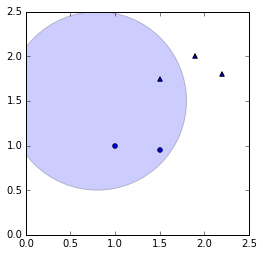

In [9]:
from matplotlib.patches import Circle
# Pintamos con diferente marcador dos partes del array, una por clase:
plt.scatter(X[0:2,0], X[0:2,1])
plt.scatter(X[2:5,0], X[2:5,1], marker="^")

plt.axes().set_aspect(1) # Ejes iguales, evita que salga una elipse.
plt.xlim(0, 2.5)  # Limites de los ejes
plt.ylim(0, 2.5)

# Incluimos el círculo, probar con diferentes valores de "nuevo".
nuevo = (0.8, 1.5)
circle=Circle(nuevo, radius=1, alpha=.2)
plt.axes().add_patch(circle)

Aunque en el radio que hemos dibujado aparecen puntos de las dos clases, el clasificador encuentra dos puntos de la clase "a" y solo uno de la clase "b" por lo que se decanta por la segunda.

## Cargando datos con pandas
En muchos casos descargamos de la Web datos u los obtenemos por otra vía como ficheros o en otros formatos. El tipo `DataFrame` de la biblioteca pandas nos permite tratar con esos datos de manera sencilla.

In [10]:
import pandas as pd
# Leemos un fichero con formato de texto, con campos separados por comas ("comma separated values")
datos = pd.read_csv("winequality-white.csv", sep=";")
datos.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45,170,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14,132,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30,97,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.40,9.9,6


Al igual que `read_csv()`, hay otras funciones para otros formatos de datos, por ejemplo `read_excel()`. Puede consultarse la documentación de pandas para ver todas las opciones disponibles.

Una vez tenemos el dataset cargado, podemos seleccionar los atributos para entrenar y el atributo objetivo indexando el `DataFrame`. El siguiente es un ejemplo utilizando el mismo algoritmo de búsqueda de "vecinos" pero en este caso para predecir un valor, y no para clasificar. 

In [11]:
atributos = ["pH", "sulphates", "alcohol"]
X = datos[atributos]
y = datos["quality"]

# Intentamos utilizar una regresión con k-vecinos:
from sklearn.neighbors import RadiusNeighborsRegressor

model = RadiusNeighborsRegressor(radius = 1)
print model

# Entrenamos el modelo:
model.fit(X,y)

# Predecimos la clase para tres puntos diferentes:
print model.predict([3, 0.39, 8.7])

RadiusNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
             metric_params=None, p=2, radius=1, weights='uniform')
[ 5.4935567]


Según la documentación del `dataset`, la calidad es un valor entre 1 y 10, por lo que el vino que hemos utilizado en el ejemplo es mediocre. Hasta el momento simplemente preparamos los datos, entrenamos un clasificador y lo utilizamos. Lógicamente, es necesario evaluar cuán buenos son los modelos.

También en este último caso hemos simplemente tomado algunos atributos arbitrariamente de entre todos los posibles en el `dataset`, sin ningún criterio. Realmente, la selección de los atributos más relevantes es un paso muy importante que se denomina ingeniería de características (**feature engineering**) y que es determinante para la calidad del resultado final.

## Creando datos con sklearn
scikit-learn nos proporciona en su módulo sklearn.datasets algunas funciones para crear datos ficticios que se ajusten a diferentes tipos de problemas. Esto es muy útil para probar diferentes algoritmos.

Por ejemplo, si queremos generar datos para un problema de clasificación ficticio con tres atributos (y dos de ellos redundantes, es decir, correlacionados) y tres clases, podríamos utilizar la función [`make_classification`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html#sklearn.datasets.make_classification).

In [12]:
import sklearn
from sklearn.datasets import make_classification
X, Y = sklearn.datasets.make_classification(n_features=5, n_redundant=2, 
                                            n_informative=3, n_classes=3)

print X [0:5, :]
print len(X)  # Por defecto genera 100 instancias.

[[-0.02927079  2.40615706  1.93451376 -1.45200973  1.75678331]
 [ 0.61025991 -2.05895715  1.15604793 -3.04529295 -1.58977143]
 [ 0.25689234 -1.16621081  1.19161726 -1.98127362 -1.21496064]
 [-0.92836572  1.88162073  1.40439892  1.50601275  0.0649857 ]
 [-0.07117144 -0.81863797  0.68088261 -0.53897308 -1.17371233]]
100


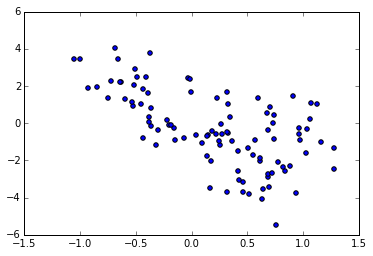

In [13]:
plt.scatter(X[:, 0], X[:, 1])

Veamos un ejemplo con un clasificador cualquiera.

In [14]:
X, Y = sklearn.datasets.make_classification(n_samples = 50000, n_features=5, n_redundant=0, 
                                            n_informative=3, n_classes=2)

from sklearn.linear_model import SGDClassifier
m = SGDClassifier()
m.fit(X, Y)
print m.score(X, Y)

0.8475


Una forma de observar la calidad del modelo son las **matrices de confusión**. Una matriz de confusión nos resume los errores y aciertos del modelo para un conjunto de datos. Para dos clases, nos proporciona una matriz 2x2, con el significado que nos describe [Wikipedia](https://en.wikipedia.org/wiki/Confusion_matrix).

[[19961  4991]
 [ 2634 22414]]


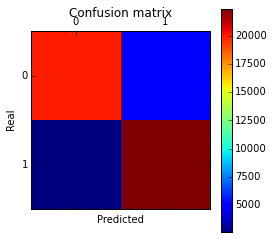

In [15]:
from sklearn.metrics import confusion_matrix

# Usamos el clasificador sobre todos los datos:
y_pred = m.predict(X)

cm = confusion_matrix(Y, y_pred)
print cm

# Dibujamos la matriz
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('Real')
plt.xlabel('Predicted')
plt.show()

Vemos que el número de falsos positivos y falsos negativos es significativamente menor al de los verdaderos (positivos y negativos). NOTA: Los valores concretos dependen de la generación aleatoria del `dataset`.

## Apéndice: matrices dispersas
En ocasiones tenemos conjuntos de datos donde realmente la mayoría de los valores son nulos, a esto se le llama **matrices dispersas**. Como se puede apreciar, usar arrays de `NumPy` para estos datos consume mucho espacio en memoria para representar pocos datos no nulos.

No vamos a trabajar con matrices dispersas, pero es importante conocerlo para los casos en que sean necesario optimizar la memoria.

In [16]:
x = np.random.random( (10, 10))
# Ponemos a cero los valores menores de 0.8
x[x<0.8] = 0
print x

[[ 0.          0.          0.          0.          0.          0.
   0.83522032  0.          0.85540767  0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.87133794  0.          0.          0.        ]
 [ 0.          0.          0.93835262  0.82021112  0.          0.
   0.82094808  0.89316577  0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.          0.
   0.87767057  0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.86754004  0.          0.          0.80792359]
 [ 0.          0.          0.82276416  0.          0.          0.          0.
   0.          0.          0.        ]
 [ 0.99776587  0.          0.95624253  0.          0.          0.88294331
   0.          0.          0.8110774   0.        ]
 [ 0.          0.          0.93203938  0.98937145  0.          0.          0.886301
   0.          0.          0.        ]
 [ 0.          0.          0.          0.         

Hay una forma de hacer representaciones compactas, que solo guardan los valores no nulos.

In [17]:
from scipy.sparse import csr_matrix
x2 = csr_matrix(x)
print x2

  (0, 6)	0.835220323446
  (0, 8)	0.855407670689
  (1, 6)	0.871337937618
  (2, 2)	0.93835262218
  (2, 3)	0.820211120075
  (2, 6)	0.820948081792
  (2, 7)	0.893165774507
  (3, 7)	0.877670571821
  (4, 6)	0.867540037441
  (4, 9)	0.807923585847
  (5, 2)	0.822764155241
  (6, 0)	0.997765873927
  (6, 2)	0.956242530306
  (6, 5)	0.88294331108
  (6, 8)	0.811077404727
  (7, 2)	0.932039381525
  (7, 3)	0.989371447816
  (7, 6)	0.886300998852
  (8, 5)	0.924825553988
  (8, 8)	0.896466862323
  (8, 9)	0.890635545943
  (9, 5)	0.899573884693
  (9, 6)	0.929565390742
  (9, 8)	0.944782030088


In [18]:
# Podemos recuperar la forma original:
print x2.toarray()

[[ 0.          0.          0.          0.          0.          0.
   0.83522032  0.          0.85540767  0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.87133794  0.          0.          0.        ]
 [ 0.          0.          0.93835262  0.82021112  0.          0.
   0.82094808  0.89316577  0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.          0.
   0.87767057  0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.86754004  0.          0.          0.80792359]
 [ 0.          0.          0.82276416  0.          0.          0.          0.
   0.          0.          0.        ]
 [ 0.99776587  0.          0.95624253  0.          0.          0.88294331
   0.          0.          0.8110774   0.        ]
 [ 0.          0.          0.93203938  0.98937145  0.          0.          0.886301
   0.          0.          0.        ]
 [ 0.          0.          0.          0.         

También se pueden utilizar otras técnicas para matrices dispersas, tales como las matrices [LIL](http://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.sparse.lil_matrix.html). El módulo [`scipy.sparse`](http://docs.scipy.org/doc/scipy-0.14.0/reference/sparse.html) tiene utilidades para muchos otros formatos.